# Project Euler Problem 50

<img src="pe50.PNG">

In [1]:
import time
import eulerlib
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Function

In mathematics, the Sieve of Eratosthenes is an algorithm for finding all prime numbers up to any given limit. You can read more about it in the [Wikipedia page](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

The function below was created with the explanation and tips based on this [Khan Academy video](https://www.khanacademy.org/computing/computer-science/cryptography/comp-number-theory/v/sieve-of-eratosthenes-prime-adventure-part-4).

In [2]:
def sieve(n):
    '''Returns all the prime numbers between the range of 0 and the input number.
    Args:
        n (int): An integer
    Returns:
        A list of prime numbers
    Raises:
        error if input is float or negative
    '''
    nlist = list(range(n + 1))
    nroot = int(n ** 0.5)
    
    nlist[0] = False
    nlist[1] = False
    
    for i in range(nroot + 1):
        if not nlist[i]:
            continue
        for j in range(i**2, n+1, i):
            nlist[j] = False
            
    primes = [p for p in nlist if p]
    
    return primes

## Test 

The eulerlib library contains similar functions as the function created above. I will be using this library to test and verify my function.

In [3]:
tests = [100, 568, 1000, 4000]
confirmation = []
for test in tests:
    euler_primes = eulerlib.primes(test)
    sieve_primes = sieve(test)
    if euler_primes == sieve_primes:
        confirmation.append(True)
    else:
        confirmation.append(False)

if all(x == confirmation[0] for x in confirmation):
    print('Sieve function is working properly')
else:
    print('There is something wrong with sieve function')
    print('confirmation')

Sieve function is working properly


## Function to Solve Problem

The goal is to find the prime number with the **highest** number of consecutive prime numbers in its sum. The goal is NOT the largest prime number with consecutive prime numbers in its sum.

In [4]:
def prime_with_longest_sum(num):
    
    largest_prime = 0
    length = 0
    primes = sieve(num)
    
    for i in range(len(primes)):
        consec = primes[i:]
        j = i
        prime_sum = 0
        for prime_num in consec:
            prime_sum += prime_num
            if prime_sum > num:
                break
            j += 1
            if (prime_sum in primes) and (j-i > length):
                length = j - i
                largest_prime = prime_sum
                
    return largest_prime, length

This function starts at the first prime and iterates to add the next prime numbers in the list. Once the sumation reaches the input value, the function breaks the loop. The function checks to see if the summation value is a prime number in the prime number list and if it the length of the consecutive sequence is longer than the length stored. If both conditions are met, the function stores the sum as the largest prime and stores the new length.

We will manually test this function from the givens in the problem. For input of 100, the output should be 41 as the largest prime with 6 terms. For input of 1000, the output should be 953 with 21 terms.

In [5]:
test_inputs = [100,1000]
desired_outputs = [(41, 6), (953, 21)]

test_outputs = []
for input_ in test_inputs:
    output = prime_with_longest_sum(input_)
    test_outputs.append(output)
    
if test_outputs == desired_outputs:
    print('Function is accurate according to test')
else:
    print('Function is inaccurate')

Function is accurate according to test


In [6]:
#The commented out task below has to be interrupted as it times out

#largest_prime, terms = prime_with_longest_sum(1000000)

There is a runtime error with the function to solve the euler problem. We will look at runtimes to find any insights.

In [7]:
inputs = [100, 500, 1000, 5000, 10000, 50000, 100000]
runtimes = []

for i in inputs:
    start = time.time()
    prime_with_longest_sum(i)
    runtime = time.time() - start
    runtimes.append(runtime)
    
runtimes

[0.0,
 0.0,
 0.0013263225555419922,
 0.03962826728820801,
 0.17215657234191895,
 3.888977289199829,
 14.507899761199951]

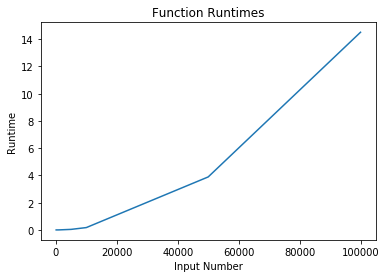

In [8]:
#plot runtimes 
plt.plot(inputs, runtimes)
plt.title('Function Runtimes')
plt.xlabel('Input Number')
plt.ylabel('Runtime')
plt.show()

The relationship between the runtime and input show inefficient time complexity of our current function. This explains why our function timed out.

We need to update our function for better efficiency.

## Function Updated

In [9]:
def prime_with_longest_sum_2(num):
    
    largest_prime = 0
    length = 0
    primes = sieve(num)
    
    for i in range(len(primes)):
        for j in range(i + length, len(primes)):
            prime_sum  = sum(primes[i:j])
            if prime_sum > num:
                break
            else:
                if prime_sum in primes:
                    length = j - i
                    largest_prime = prime_sum
    
    return largest_prime, length

In the updated function, the focus is to minimize the sum iterations from scratch. Once a promising length of sequence is identified in the function, it will only focus on finding consecutive sums of sequence higher in length. Hopefully this lowers the runtime and solves the problem without timing out.

In [10]:
#testing the function
test_inputs = [100,1000]
desired_outputs = [(41, 6), (953, 21)]

test_outputs = []
for input_ in test_inputs:
    output = prime_with_longest_sum_2(input_)
    test_outputs.append(output)
    
if test_outputs == desired_outputs:
    print('Function is accurate according to test')
else:
    print('Function is inaccurate')

Function is accurate according to test


In [11]:
#observing runtime and making sure function can run with 1000000 as input
inputs = [100, 500, 1000, 5000, 10000, 50000, 100000, 1000000]
runtimes = []

for i in inputs:
    start = time.time()
    prime_with_longest_sum_2(i)
    runtime = time.time() - start
    runtimes.append(runtime)
    
runtimes

[0.0,
 0.0,
 0.0023467540740966797,
 0.0020279884338378906,
 0.003646373748779297,
 0.03699541091918945,
 0.13550066947937012,
 3.3895819187164307]

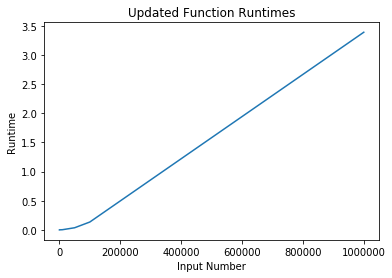

In [12]:
#plot updated runtimes 
plt.plot(inputs, runtimes)
plt.title('Updated Function Runtimes')
plt.xlabel('Input Number')
plt.ylabel('Runtime')
plt.show()

The relationship looks linear but may still be of higher order. Regardless, we can see that the updated function was able to solve for the problem at hand in under 4 seconds and did not time out. 

## Answer

In [13]:
n = 1000000
largest_prime, terms = prime_with_longest_sum_2(n)
print('ANSWER')
print('-'*20)
print('''The longest sum of consecutive primes below {} 
that adds to a prime, contains {} terms, and is equal to {}.'''.format(n, terms, largest_prime)) 

ANSWER
--------------------
The longest sum of consecutive primes below 1000000 
that adds to a prime, contains 543 terms, and is equal to 997651.
